# Smartphone Specifications and Pricing Trends

In [71]:
!pip install scipy
!pip install scikit-learn



In [72]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

In [75]:
#Read CSV File
df = pd.read_csv(r"C:\Users\saini\Downloads\smartphones.csv")
# Display the first few rows of the dataframe
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Display Size,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256,Yellow,6.10,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128,Blue,6.40,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128,Blue,6.55,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128,Gray,6.60,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512,White,6.50,799.00


In [76]:
df.head(10) ##to show head 

,Smartphone,Brand,Model,RAM,Storage,Color,Display Size,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256,Yellow,6.10,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128,Blue,6.40,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128,Blue,6.55,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128,Gray,6.60,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512,White,6.50,799.00
5,Motorola Moto E32s 4/64GB Gris Libre,Motorola,Moto E32s,4.0,64,Gray,6.55,148.52
6,Nothing Phone (2) 12/256GB Blanco Libre,Nothing,Phone (2),12.0,256,White,6.50,699.00
7,Realme 9 Pro 5G 8/128GB Negro Libre,Realme,9 Pro,8.0,128,Black,6.10,352.59
8,Samsung Galaxy M23 5G 4/128GB Verde Libre,Samsung,Galaxy M23,4.0,128,Green,6.40,279.00
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito ...,Xiaomi,Redmi Note 12,8.0,256,Gray,6.60,329.99


In [77]:
df.tail(10) #to show head

,Smartphone,Brand,Model,RAM,Storage,Color,Display Size,Final Price
489,Realme 9 5G 4/128GB Negro Libre,Realme,9,4.0,128,Black,6.1,282.58
490,Apple iPhone 12 Mini 256GB (PRODUCT)RED Libre,Apple,iPhone 12,NaN,256,Red,6.1,859.00
491,CAT S42H+ 3/32GB Rugerizado Negro Libre,CAT,S42H+,3.0,32,Black,6.5,189.99
492,Apple iPhone 13 256GB Azul Libre,Apple,iPhone 13,NaN,256,Blue,6.1,1029.00
493,Samsung Galaxy S23 Plus 256GB Lila Libre,Samsung,Galaxy S23,NaN,256,Purple,6.2,893.00
494,Xiaomi Redmi Note 12 Pro 5G 6/128GB Negro Libre,Xiaomi,Redmi Note 12,6.0,128,Black,6.6,379.99
495,Samsung Galaxy A34 5G 6/128GB Verde Libre,Samsung,Galaxy A34,6.0,128,Green,6.2,299.90
496,Apple iPhone 12 256GB Púrpura Libre,Apple,iPhone 12,NaN,256,Purple,6.1,979.00
497,OnePlus Nord N10 5G 6/128GB Azul Hielo Libre,OnePlus,Nord N10,6.0,128,Blue,6.7,219.00
498,Apple iPhone 12 Mini 64GB Azul Libre,Apple,iPhone 12,NaN,64,Blue,6.1,689.00


In [78]:
df.columns  ##show columns

Index(['Smartphone', 'Brand', 'Model', 'RAM', 'Storage', 'Color',
       'Display Size', 'Final Price'],
      dtype='object')

In [79]:
df.info() #show info of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Smartphone    499 non-null    object 
 1   Brand         499 non-null    object 
 2   Model         499 non-null    object 
 3   RAM           349 non-null    float64
 4   Storage       499 non-null    int64  
 5   Color         499 non-null    object 
 6   Display Size  499 non-null    float64
 7   Final Price   499 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 31.3+ KB


In [80]:
df.describe() #to describe the data set

,RAM,Storage,Display Size,Final Price
count,349.000000,499.000000,499.000000,499.000000
mean,6.232092,179.531062,6.342786,549.173607
std,2.688952,117.201010,0.223108,427.666601
min,1.000000,2.000000,6.100000,69.370000
25%,4.000000,128.000000,6.100000,214.495000
50%,6.000000,128.000000,6.200000,382.990000
75%,8.000000,256.000000,6.550000,829.010000
max,12.000000,512.000000,6.700000,1919.000000


In [81]:
# Display the DataFrame
print("Smartphone Specifications and Pricing:")
print(df)

Smartphone Specifications and Pricing:
                                          Smartphone     Brand  \
0                 Realme C55 8/256GB Sunshower Libre    Realme   
1           Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung   
2       Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola   
3           Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi   
4            Nothing Phone (2) 12/512GB Blanco Libre   Nothing   
..                                               ...       ...   
494  Xiaomi Redmi Note 12 Pro 5G 6/128GB Negro Libre    Xiaomi   
495        Samsung Galaxy A34 5G 6/128GB Verde Libre   Samsung   
496              Apple iPhone 12 256GB Púrpura Libre     Apple   
497     OnePlus Nord N10 5G 6/128GB Azul Hielo Libre   OnePlus   
498             Apple iPhone 12 Mini 64GB Azul Libre     Apple   

              Model   RAM  Storage   Color  Display Size  Final Price  
0               C55   8.0      256  Yellow          6.10       231.60  
1        Galaxy M23   4.

### Graphically Representation

Cluster centers:
[[-0.87626495  0.97197518 -0.8612192   1.4786345 ]
 [ 0.05117451 -0.36460262 -0.84724767 -0.34042278]
 [ 1.09393821 -0.72044399  1.22486825 -0.81785484]
 [-0.46403667 -0.14171326  0.80379464 -0.44469477]
 [ 1.14484505  0.62096045  1.08804679 -0.12986998]]


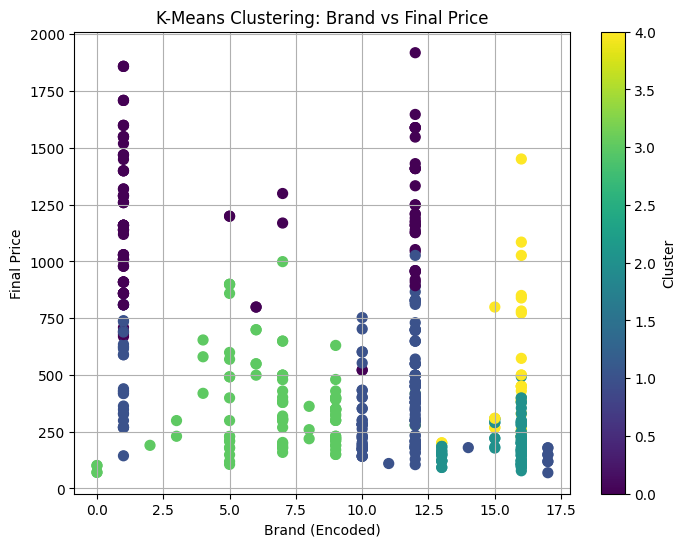

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the data
#Read CSV File
df = pd.read_csv(r"C:\Users\saini\Downloads\smartphones.csv")
# Display the first few rows of the dataframe
df.head()
# Step 2: Encode categorical columns
le_brand = LabelEncoder()
df['Brand_Encoded'] = le_brand.fit_transform(df['Brand'])

le_color = LabelEncoder()
df['Color_Encoded'] = le_color.fit_transform(df['Color'])

# Step 3: Prepare the features for clustering
features = df[['Brand_Encoded', 'Storage', 'Display Size', 'Final Price']].dropna()

# Step 4: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choosing 5 clusters as an example
kmeans.fit(features_scaled)

# Step 6: Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Step 7: Analyze clusters
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Step 8: Visualize clusters (Brand vs Final Price example)
plt.figure(figsize=(8, 6))
plt.scatter(features['Brand_Encoded'], features['Final Price'], c=kmeans.labels_, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering: Brand vs Final Price')
plt.xlabel('Brand (Encoded)')
plt.ylabel('Final Price')
plt.grid(True)
plt.show()

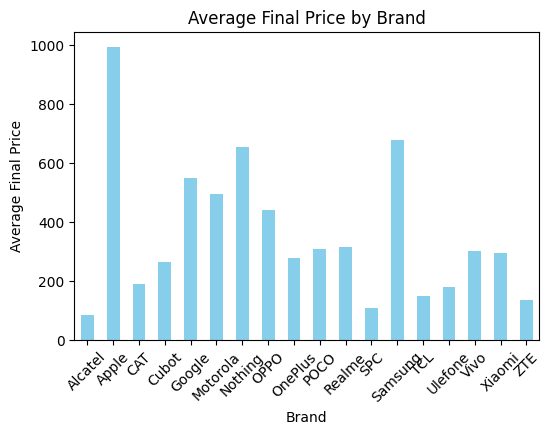

In [59]:
# Create a bar plot for Calculate the Average Price by Brand:
average_price_by_brand = df.groupby('Brand')['Final Price'].mean()

# Create a bar plot
plt.figure(figsize=(6, 4))
average_price_by_brand.plot(kind='bar', color='skyblue')
plt.title('Average Final Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Final Price')
plt.xticks(rotation=45)
plt.show()

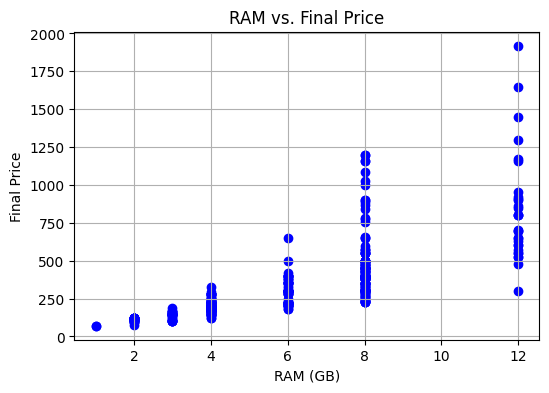

In [61]:
# Create a scatter plot for Final Price and RAM
plt.figure(figsize=(6, 4))
plt.scatter(df['RAM'], df['Final Price'], color='blue')
plt.title('RAM vs. Final Price')  # Adding a title
plt.xlabel('RAM (GB)')            # Labeling the X-axis
plt.ylabel('Final Price')         # Labeling the Y-axis
plt.grid(True)                    # Adding grid lines for better readability
plt.show()                        # Displaying the plot

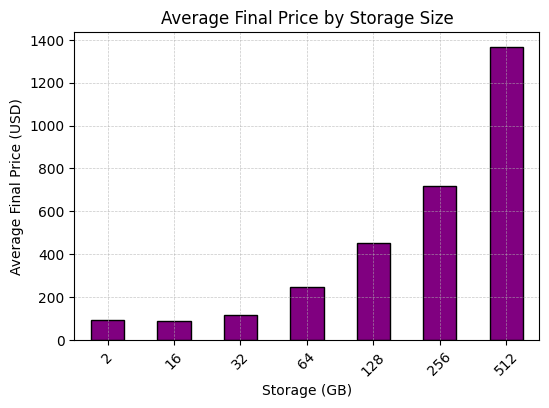

In [62]:
# Group by 'Storage' and calculate the average 'Final Price' for each storage size
average_price_by_storage = df.groupby('Storage')['Final Price'].mean()

# Create a bar plot for average 'Final Price' by storage size
plt.figure(figsize=(6, 4))
average_price_by_storage.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Average Final Price by Storage Size')
plt.xlabel('Storage (GB)')
plt.ylabel('Average Final Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

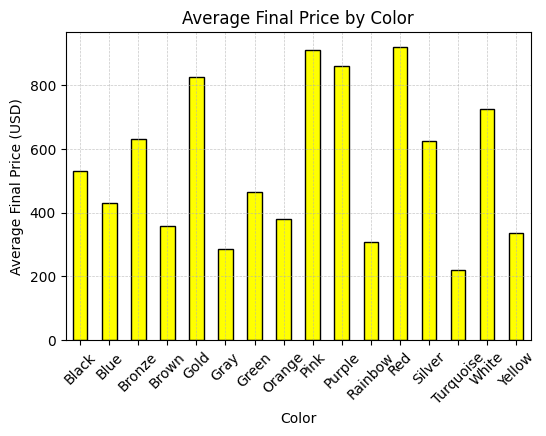

In [64]:
# Group by 'Color' and calculate the average 'Final Price' for each color
average_price_by_color = df.groupby('Color')['Final Price'].mean()

# Create a bar plot for average 'Final Price' by color
plt.figure(figsize=(6, 4))
average_price_by_color.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Average Final Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Final Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

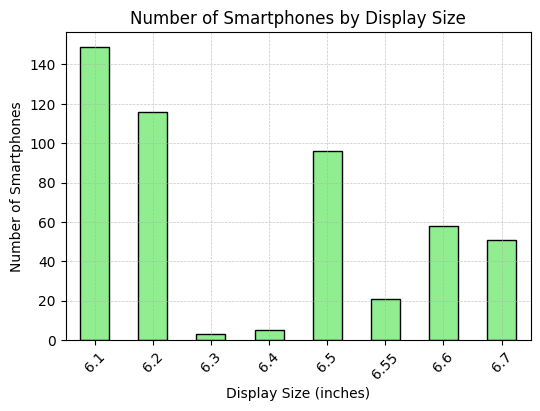

In [65]:
# Count the number of smartphones by 'Display Size'
smartphone_count_by_display = df['Display Size'].value_counts().sort_index()

# Create a bar plot for the number of smartphones by display size
plt.figure(figsize=(6, 4))
smartphone_count_by_display.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Smartphones by Display Size')
plt.xlabel('Display Size (inches)')
plt.ylabel('Number of Smartphones')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [50]:
highest_rated_display = df.loc[df['Display Size'].idxmax()]
print(df)

                                          Smartphone     Brand  \
0                 Realme C55 8/256GB Sunshower Libre    Realme   
1           Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung   
2       Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola   
3           Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi   
4            Nothing Phone (2) 12/512GB Blanco Libre   Nothing   
..                                               ...       ...   
494  Xiaomi Redmi Note 12 Pro 5G 6/128GB Negro Libre    Xiaomi   
495        Samsung Galaxy A34 5G 6/128GB Verde Libre   Samsung   
496              Apple iPhone 12 256GB Púrpura Libre     Apple   
497     OnePlus Nord N10 5G 6/128GB Azul Hielo Libre   OnePlus   
498             Apple iPhone 12 Mini 64GB Azul Libre     Apple   

              Model   RAM  Storage   Color  Display Size  Final Price  
0               C55   8.0      256  Yellow          6.10       231.60  
1        Galaxy M23   4.0      128    Blue          6.40       

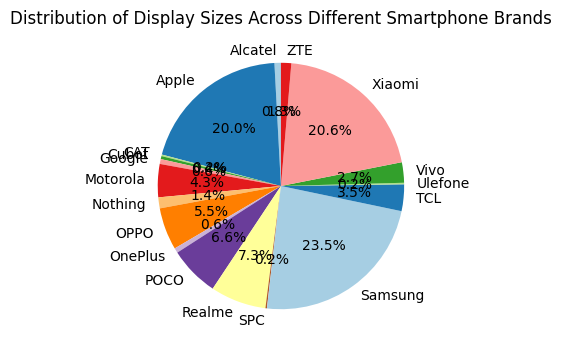

In [66]:
# Group the data by 'Brand' and sum the 'Display Size'
grouped_data = df.groupby('Brand')['Display Size'].sum()

# Plot the pie chart
plt.figure(figsize=(6, 4))
grouped_data.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Display Sizes Across Different Smartphone Brands')
plt.ylabel('')
plt.show()

## TREND ANALYSIS

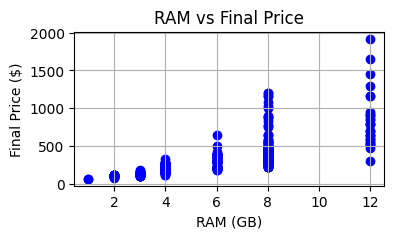

In [67]:
# Trend Analysis: RAM vs Final Price
plt.figure(figsize=(4, 2))
plt.scatter(df['RAM'], df['Final Price'], color='blue')
plt.title('RAM vs Final Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Final Price ($)')
plt.grid(True)
plt.show()

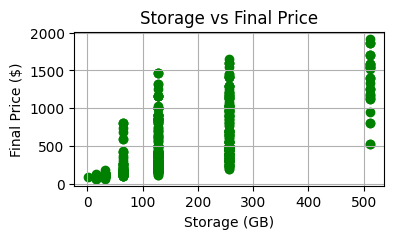

In [68]:
# Trend Analysis: Storage vs Final Price
plt.figure(figsize=(4, 2))
plt.scatter(df['Storage'], df['Final Price'], color='green')
plt.title('Storage vs Final Price')
plt.xlabel('Storage (GB)')
plt.ylabel('Final Price ($)')
plt.grid(True)

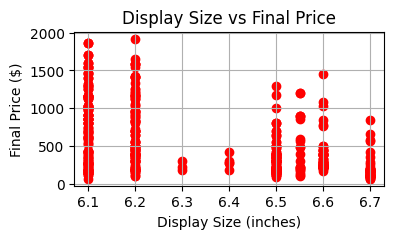

In [69]:
# Trend Analysis: Display Size vs Final Price
plt.figure(figsize=(4, 2))
plt.scatter(df['Display Size'], df['Final Price'], color='red')
plt.title('Display Size vs Final Price')
plt.xlabel('Display Size (inches)')
plt.ylabel('Final Price ($)')
plt.grid(True)
plt.show()

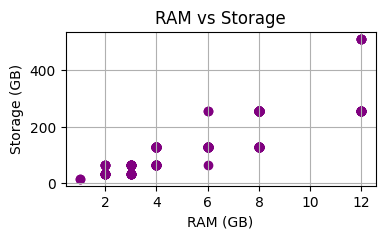

In [70]:
# Trend Analysis: RAM vs Storage
plt.figure(figsize=(4, 2))
plt.scatter(df['RAM'], df['Storage'], color='purple')
plt.title('RAM vs Storage')
plt.xlabel('RAM (GB)')
plt.ylabel('Storage (GB)')
plt.grid(True)
plt.show()

Cluster centers:
[[-0.87626495  0.97197518 -0.8612192   1.4786345 ]
 [ 0.05117451 -0.36460262 -0.84724767 -0.34042278]
 [ 1.09393821 -0.72044399  1.22486825 -0.81785484]
 [-0.46403667 -0.14171326  0.80379464 -0.44469477]
 [ 1.14484505  0.62096045  1.08804679 -0.12986998]]


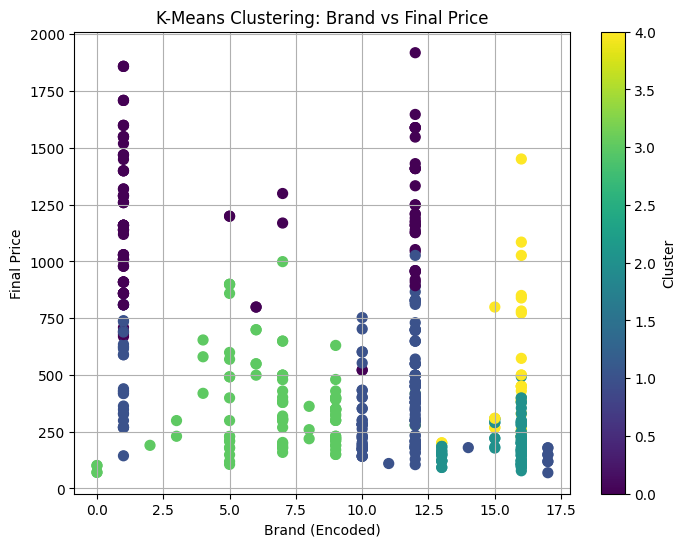

In [86]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the data
#Read CSV File
df = pd.read_csv(r"C:\Users\saini\Downloads\smartphones.csv")
# Display the first few rows of the dataframe
df.head()
# Step 2: Encode categorical columns
le_brand = LabelEncoder()
df['Brand_Encoded'] = le_brand.fit_transform(df['Brand'])

le_color = LabelEncoder()
df['Color_Encoded'] = le_color.fit_transform(df['Color'])

# Step 3: Prepare the features for clustering
features = df[['Brand_Encoded', 'Storage', 'Display Size', 'Final Price']].dropna()

# Step 4: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choosing 5 clusters as an example
kmeans.fit(features_scaled)

# Step 6: Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Step 7: Analyze clusters
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Step 8: Visualize clusters (Brand vs Final Price example)
plt.figure(figsize=(8, 6))
plt.scatter(features['Brand_Encoded'], features['Final Price'], c=kmeans.labels_, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering: Brand vs Final Price')
plt.xlabel('Brand (Encoded)')
plt.ylabel('Final Price')
plt.grid(True)
plt.show()

C:\Users\saini\OneDrive\Desktop\my_python_projects\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\saini\OneDrive\Desktop\my_python_projects\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executab

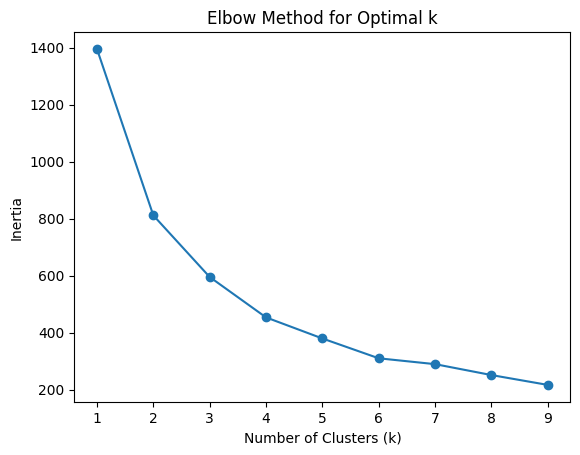

    RAM  Storage  Display Size  Final Price  Cluster
0   8.0      256          6.10       231.60        0
1   4.0      128          6.40       279.00        1
2   4.0      128          6.55       179.01        1
3   6.0      128          6.60       279.99        1
4  12.0      512          6.50       799.00        2


In [57]:
# Load the dataset
df = pd.read_csv(r"C:\Users\saini\Downloads\smartphones.csv")
# Display the first few rows of the dataframe
df.head()
# Select relevant features for clustering
features = data[['RAM', 'Storage', 'Display Size', 'Final Price']]

# Handle missing values (if any)
features = features.dropna()

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-means clustering with the chosen number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Save the clustered dataset to a new CSV file
data.to_csv("smartphone_clusters.csv", index=False)

# Display the first few rows of the dataset with cluster labels
print(data.head())